# Multiple Linear Regression
Arun Kumar
10/13/2021

In [122]:
# Import the required packages
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [123]:
# Import dataset
InputData = pd.read_csv('C:/PythonData/CarData.csv')
InputData.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUEL TYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,COMB,CO2EMISSIONS,CO2 RATING
0,2016,ACURA,ILX,COMPACT,2.4,4,AM8,Z,9.3,6.6,8.1,35,189,7
1,2016,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,AS9,Z,12.7,9.1,11.1,25,254,5
2,2016,ACURA,MDX SH-AWD ELITE,SUV - SMALL,3.5,6,AS9,Z,12.2,9.1,10.7,26,251,5
3,2016,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.4,8.6,10.7,26,249,5
4,2016,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,235,5


In [124]:
# Shape function returns the shape of the array
InputData.shape 

(1110, 14)

In [125]:
# Info function is used to print a concise summary of a Dataframe
InputData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MODEL YEAR            1110 non-null   int64  
 1   MAKE                  1110 non-null   object 
 2   MODEL                 1110 non-null   object 
 3   VEHICLE CLASS         1110 non-null   object 
 4   ENGINESIZE            1110 non-null   float64
 5   CYLINDERS             1110 non-null   int64  
 6   TRANSMISSION          1110 non-null   object 
 7   FUEL TYPE             1110 non-null   object 
 8   FUELCONSUMPTION_CITY  1110 non-null   float64
 9   FUELCONSUMPTION_HWY   1110 non-null   float64
 10  FUELCONSUMPTION_COMB  1110 non-null   float64
 11  COMB                  1110 non-null   int64  
 12  CO2EMISSIONS          1110 non-null   int64  
 13  CO2 RATING            1110 non-null   int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 121.5+ KB


In [126]:
# To Check out the data type of each column in the dataset
InputData.dtypes

MODEL YEAR                int64
MAKE                     object
MODEL                    object
VEHICLE CLASS            object
ENGINESIZE              float64
CYLINDERS                 int64
TRANSMISSION             object
FUEL TYPE                object
FUELCONSUMPTION_CITY    float64
FUELCONSUMPTION_HWY     float64
FUELCONSUMPTION_COMB    float64
COMB                      int64
CO2EMISSIONS              int64
CO2 RATING                int64
dtype: object

In [127]:
InputData.columns

Index(['MODEL YEAR ', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINESIZE',
       'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'COMB', 'CO2EMISSIONS',
       'CO2 RATING '],
      dtype='object')

<h3><b> Identifying the missing values</b></h3>

In [128]:
#We have used the below code to detect if there are any missing values which are being represented by either '?' or blank cell.
flag = False
for i in InputData.columns.tolist():
    if ('?' in InputData[i].tolist() or '' in InputData[i].tolist()):
        flag = True
print(flag)

False


In [129]:
# check Null values in the dataset
Temp=InputData.isnull()
Temp.head()

,MODEL YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUEL TYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,COMB,CO2EMISSIONS,CO2 RATING
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [130]:
InputData.isnull().sum()

MODEL YEAR              0
MAKE                    0
MODEL                   0
VEHICLE CLASS           0
ENGINESIZE              0
CYLINDERS               0
TRANSMISSION            0
FUEL TYPE               0
FUELCONSUMPTION_CITY    0
FUELCONSUMPTION_HWY     0
FUELCONSUMPTION_COMB    0
COMB                    0
CO2EMISSIONS            0
CO2 RATING              0
dtype: int64

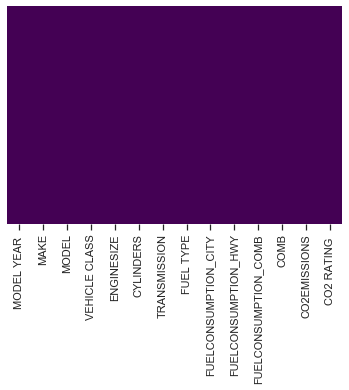

In [131]:
plt.figure(figsize=(6,4))
sns.heatmap(InputData.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [132]:
for i in Temp.columns.tolist():
    print(Temp[i].value_counts())
    #print('') # This is used to make the space between two print details

False    1110
Name: MODEL YEAR , dtype: int64
False    1110
Name: MAKE, dtype: int64
False    1110
Name: MODEL, dtype: int64
False    1110
Name: VEHICLE CLASS, dtype: int64
False    1110
Name: ENGINESIZE, dtype: int64
False    1110
Name: CYLINDERS, dtype: int64
False    1110
Name: TRANSMISSION, dtype: int64
False    1110
Name: FUEL TYPE, dtype: int64
False    1110
Name: FUELCONSUMPTION_CITY, dtype: int64
False    1110
Name: FUELCONSUMPTION_HWY, dtype: int64
False    1110
Name: FUELCONSUMPTION_COMB, dtype: int64
False    1110
Name: COMB, dtype: int64
False    1110
Name: CO2EMISSIONS, dtype: int64
False    1110
Name: CO2 RATING , dtype: int64


In [133]:
SelectedFeatureData = InputData[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
SelectedFeatureData.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.4,4,9.3,6.6,8.1,189
1,3.5,6,12.7,9.1,11.1,254
2,3.5,6,12.2,9.1,10.7,251
3,3.5,6,12.4,8.6,10.7,249
4,3.5,6,11.9,7.7,10.0,235
5,3.5,6,8.0,7.5,7.7,180
6,2.4,4,9.6,6.6,8.3,196
7,3.5,6,11.2,7.5,9.6,226
8,1.8,4,9.7,6.9,8.4,197


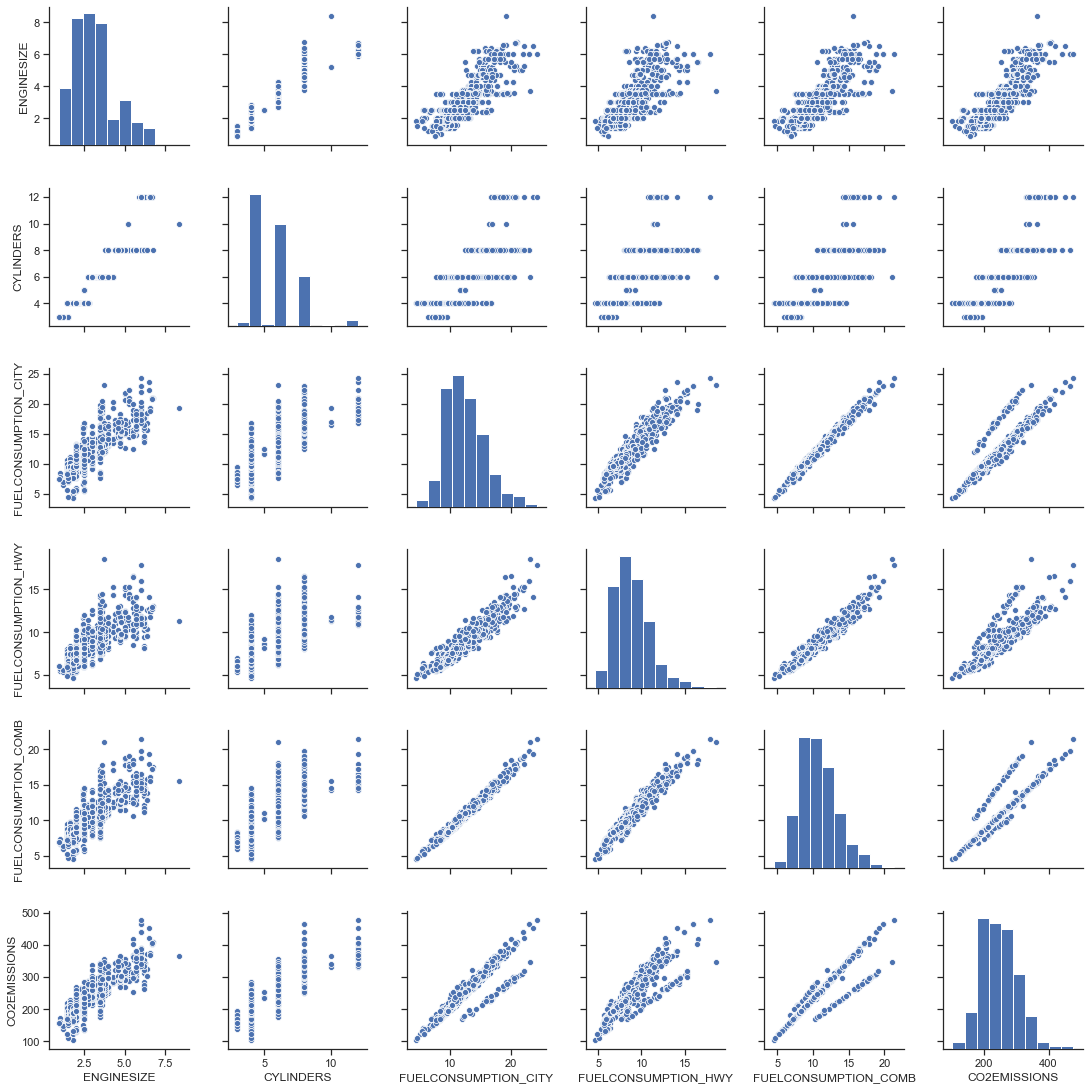

In [134]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(SelectedFeatureData)

In [135]:
Temp=SelectedFeatureData.corr()
Temp

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.930961,0.822978,0.752727,0.808850,0.848276
CYLINDERS,0.930961,1.000000,0.794112,0.707872,0.774107,0.830747
FUELCONSUMPTION_CITY,0.822978,0.794112,1.000000,0.946896,0.993664,0.917587
FUELCONSUMPTION_HWY,0.752727,0.707872,0.946896,1.000000,0.976683,0.885142
FUELCONSUMPTION_COMB,0.808850,0.774107,0.993664,0.976683,1.000000,0.917430
CO2EMISSIONS,0.848276,0.830747,0.917587,0.885142,0.917430,1.000000


In [136]:
imp_cols = Temp[abs(Temp['CO2EMISSIONS']) > 0.5].index.tolist()
imp_cols

['ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'CO2EMISSIONS']

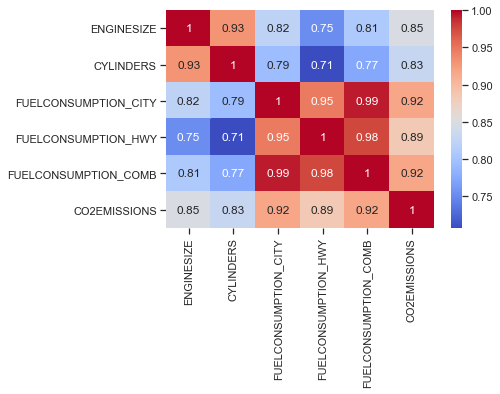

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(SelectedFeatureData[imp_cols].corr(),cmap='coolwarm',annot=True)

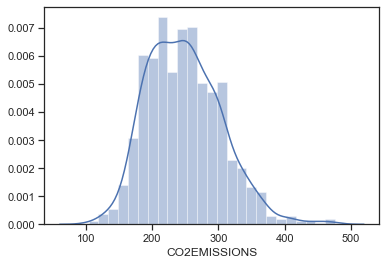

In [138]:
# SNS Distplot- Seaborn distplot lets you show a histogram with a line on it. 
# Distribution of target(dependent)variable 'CO2EMISSIONS'
sns.distplot(SelectedFeatureData['CO2EMISSIONS']);

<h2 id="multiple_regression_model">Multiple Regression Model</h2>

In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

In [139]:
# Segregating data in trraining and Test data

X= SelectedFeatureData[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
Y= SelectedFeatureData[['CO2EMISSIONS']]

from sklearn.model_selection import train_test_split
SelectedFeatureData
X_Train,X_Test,Y_Train, Y_Test = train_test_split(X,Y,train_size=0.8,random_state=100)

In [140]:
X_Train.shape,X_Test.shape,Y_Train.shape, Y_Test.shape

((888, 3), (222, 3), (888, 1), (222, 1))

In [141]:
from sklearn.linear_model import LinearRegression

#Create linear regression object
regressor = LinearRegression()
#x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
#y = np.asanyarray(train[['CO2EMISSIONS']])

regressor.fit (X_Train, Y_Train)

# Intecept and coeff of the line
print('Intercept of the model:',regressor.intercept_)
print('Coefficient of the line:',regressor.coef_)

Intercept of the model: [49.16543899]
Coefficient of the line: [[ 5.23262491  6.41635285 13.59251631]]


In [142]:
# Prediction
Y_Pred=regressor.predict(X_Test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])


 Regression Model Evaluation

In [143]:
## Model Evaluation

# MAE :- Mean Absolute Error (L1 Loss )
print("Mean absolute error (MAE) : %.2f" 
      % mean_absolute_error(Y_Test, Y_Pred))

#  MSE :- Means Square Error (L2 Loss)
print("Mean Square error (MSE): %.2f" 
      % mean_squared_error(Y_Test, Y_Pred))


# Root Mean Squared Error ( RMSE)
print("Root Mean Squared Logarithmic Error (RMSE): %.2f"
      % np.sqrt(mean_squared_error(Y_Test, Y_Pred)))

# Root Mean Squared Logarithmic Error (RMSLE)
print("Root Mean Squared Logarithmic Error (RMSLE): %.2f"
      % np.sqrt(mean_squared_log_error(Y_Test, Y_Pred)))

# R2 Score
print("R2 Score: %.2f"
      % r2_score(Y_Test, Y_Pred))


Mean absolute error (MAE) : 13.28
Mean Square error (MSE): 392.59
Root Mean Squared Logarithmic Error (RMSE): 19.81
Root Mean Squared Logarithmic Error (RMSLE): 0.08
R2 Score: 0.88
